In [1]:
!pip install -q kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jadhavamit","key":"21cbb4e515e911e38a9962bc4bbedb80"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d mstjebashazida/affectnet

Dataset URL: https://www.kaggle.com/datasets/mstjebashazida/affectnet
License(s): MIT
100% 324M/324M [00:03<00:00, 93.4MB/s]
100% 324M/324M [00:03<00:00, 111MB/s] 


In [14]:
!unzip affectnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive (3)/Train/sad/image0004201.jpg  
  inflating: archive (3)/Train/sad/image0004250.jpg  
  inflating: archive (3)/Train/sad/image0004289.jpg  
  inflating: archive (3)/Train/sad/image0004290.jpg  
  inflating: archive (3)/Train/sad/image0004297.jpg  
  inflating: archive (3)/Train/sad/image0004426.jpg  
  inflating: archive (3)/Train/sad/image0004454.jpg  
  inflating: archive (3)/Train/sad/image0004490.jpg  
  inflating: archive (3)/Train/sad/image0004498.jpg  
  inflating: archive (3)/Train/sad/image0004510.jpg  
  inflating: archive (3)/Train/sad/image0004533.jpg  
  inflating: archive (3)/Train/sad/image0004549.jpg  
  inflating: archive (3)/Train/sad/image0004551.jpg  
  inflating: archive (3)/Train/sad/image0004566.jpg  
  inflating: archive (3)/Train/sad/image0004570.jpg  
  inflating: archive (3)/Train/sad/image0004581.jpg  
  inflating: archive (3)/Train/sad/image0004595.jpg  
  inflating: archive (3)/Train/

In [13]:
from keras.utils import to_categorical
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [15]:
TRAIN_DIR = '/content/archive (3)/Train'
TEST_DIR = '/content/archive (3)/Test'

In [16]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [17]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

neutral completed
contempt completed
sad completed
surprise completed
disgust completed
happy completed
anger completed
fear completed


In [18]:
print(train)

                                                  image    label
0      /content/archive (3)/Train/neutral/ffhq_2575.png  neutral
1      /content/archive (3)/Train/neutral/ffhq_5431.png  neutral
2      /content/archive (3)/Train/neutral/ffhq_2751.png  neutral
3      /content/archive (3)/Train/neutral/ffhq_2418.png  neutral
4      /content/archive (3)/Train/neutral/ffhq_5323.png  neutral
...                                                 ...      ...
16103  /content/archive (3)/Train/fear/image0039809.jpg     fear
16104  /content/archive (3)/Train/fear/image0036793.jpg     fear
16105  /content/archive (3)/Train/fear/image0036116.jpg     fear
16106  /content/archive (3)/Train/fear/image0038734.jpg     fear
16107  /content/archive (3)/Train/fear/image0036477.jpg     fear

[16108 rows x 2 columns]


In [19]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

neutral completed
sad completed
surprise completed
disgust completed
happy completed
Anger completed
Contempt completed
fear completed


In [20]:
print(test)
print(test['image'])

                                                 image    label
0       /content/archive (3)/Test/neutral/ffhq_908.png  neutral
1       /content/archive (3)/Test/neutral/ffhq_763.png  neutral
2      /content/archive (3)/Test/neutral/ffhq_1942.png  neutral
3      /content/archive (3)/Test/neutral/ffhq_1055.png  neutral
4        /content/archive (3)/Test/neutral/ffhq_20.png  neutral
...                                                ...      ...
14513  /content/archive (3)/Test/fear/image0017706.jpg     fear
14514  /content/archive (3)/Test/fear/image0023679.jpg     fear
14515  /content/archive (3)/Test/fear/image0025899.jpg     fear
14516  /content/archive (3)/Test/fear/image0012478.jpg     fear
14517  /content/archive (3)/Test/fear/image0019842.jpg     fear

[14518 rows x 2 columns]
0         /content/archive (3)/Test/neutral/ffhq_908.png
1         /content/archive (3)/Test/neutral/ffhq_763.png
2        /content/archive (3)/Test/neutral/ffhq_1942.png
3        /content/archive (3)/Test/

In [21]:
from tqdm.notebook import tqdm

In [26]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale',target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [27]:
train_features = extract_features(train['image'])

  0%|          | 0/16108 [00:00<?, ?it/s]

In [28]:
test_features = extract_features(test['image'])

  0%|          | 0/14518 [00:00<?, ?it/s]

In [29]:
x_train = train_features/255.0
x_test = test_features/255.0

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [32]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

ValueError: y contains previously unseen labels: 'Anger'

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder on all unique labels from both train and test data
all_labels = pd.concat([train['label'], test['label']]).unique() # Assuming you have pandas imported as pd
le.fit(all_labels)

# Transform the labels in your training and test data
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [39]:
# Assuming your labels range from 1 to 8
# If labels start from 0 comment next 2 lines
y_train = y_train - 1
y_test = y_test - 1

#Clip values to be between 0 and 7
y_train = np.clip(y_train, 0, 7)
y_test = np.clip(y_test, 0, 7)

#Convert to categorical variables
y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

In [40]:
# y_train = to_categorical(y_train -1,num_classes = 8)
# y_test = to_categorical(y_test - 1,num_classes = 8)

In [1]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(8, activation='softmax'))

NameError: name 'Sequential' is not defined

In [46]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [47]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 2, validation_data = (x_test,y_test))

Epoch 1/2
126/126 ━━━━━━━━━━━━━━━━━━━━ 947s 7s/step - accuracy: 0.2975 - loss: 1.8966 - val_accuracy: 0.2414 - val_loss: 2.4894
Epoch 2/2
126/126 ━━━━━━━━━━━━━━━━━━━━ 951s 8s/step - accuracy: 0.3272 - loss: 1.8278 - val_accuracy: 0.2414 - val_loss: 2.5883


In [48]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [49]:
from keras.models import model_from_json

In [51]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [52]:
label = ['angry','contempt','disgust','fear','happy','neutral','sad','surprise']

In [53]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [54]:
image = '/content/archive (3)/Test/Contempt/ffhq_10.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


TypeError: load_img() got an unexpected keyword argument 'grayscale'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 55ms/step
model prediction is  sad


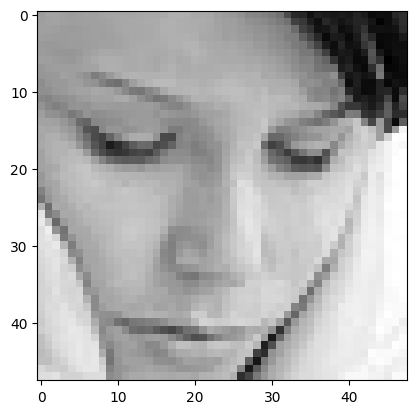

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 31ms/step
model prediction is  sad


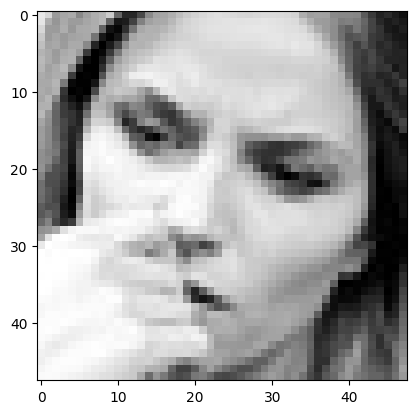

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 57ms/step
model prediction is  disgust


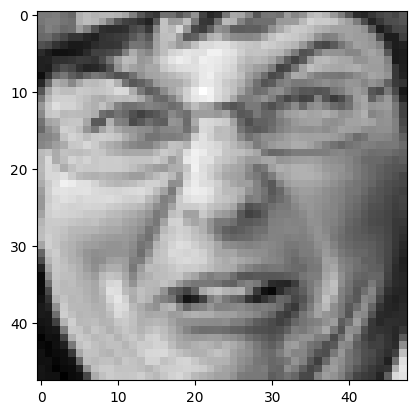

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


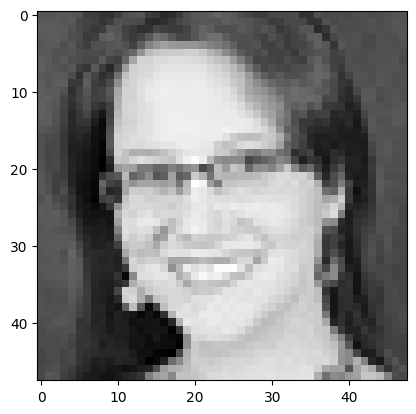

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


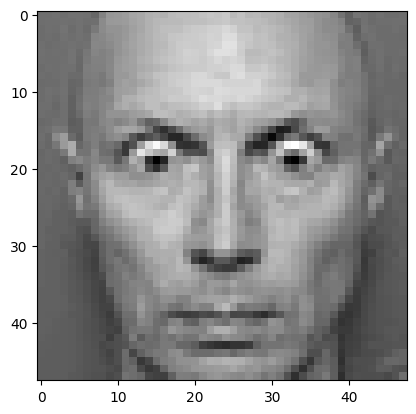

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')